Limpieza del archivo "attacks.csv" 

In [25]:
import pandas as pd
import numpy as np
import re
import pycountry

In [2]:
# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [3]:
data_or=pd.read_csv('../raw_data/attacks.csv',  encoding='ANSI')


In [4]:
data = data_or.copy()

data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
data.shape

(25723, 24)

In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
new_cols = [c.lower().strip().replace(' ', '_') for c in data.columns]



In [10]:
dict(zip(data.columns, new_cols))

{'Case Number': 'case_number',
 'Date': 'date',
 'Year': 'year',
 'Type': 'type',
 'Country': 'country',
 'Area': 'area',
 'Location': 'location',
 'Activity': 'activity',
 'Name': 'name',
 'Sex ': 'sex',
 'Age': 'age',
 'Injury': 'injury',
 'Fatal (Y/N)': 'fatal_(y/n)',
 'Time': 'time',
 'Species ': 'species',
 'Investigator or Source': 'investigator_or_source',
 'pdf': 'pdf',
 'href formula': 'href_formula',
 'href': 'href',
 'Case Number.1': 'case_number.1',
 'Case Number.2': 'case_number.2',
 'original order': 'original_order',
 'Unnamed: 22': 'unnamed:_22',
 'Unnamed: 23': 'unnamed:_23'}

In [12]:
data = data.rename(columns={k:v for k,v in zip(data.columns, new_cols)}) # k=columna vieja, v= columna nueva



In [13]:
na_columns=data.isnull().sum()

na_columns[na_columns>0]

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal_(y/n)               19960
time                      22775
species                   22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number.1             19421
case_number.2             19421
original_order            19414
unnamed:_22               25722
unnamed:_23               25721
dtype: int64

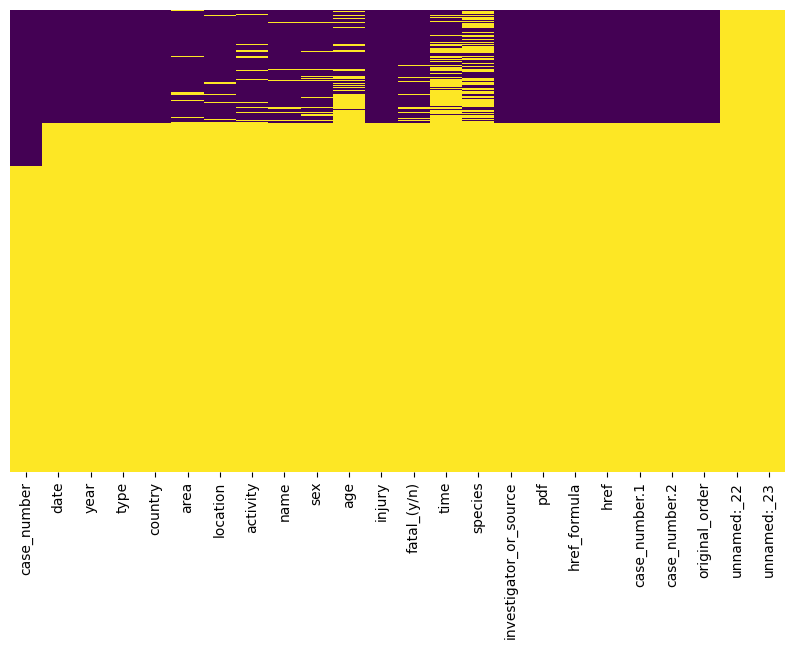

In [14]:
plt.figure(figsize=(10,6))

sns.heatmap(data.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show(); # poner ';' para evitar que imprima la dirección de memoria del objeto que estamos pintando

In [15]:
data.dropna(inplace=True, subset=['date', 'year', 'type', 'pdf'])

In [16]:
data.shape

(6296, 24)

In [17]:
data.tail()

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


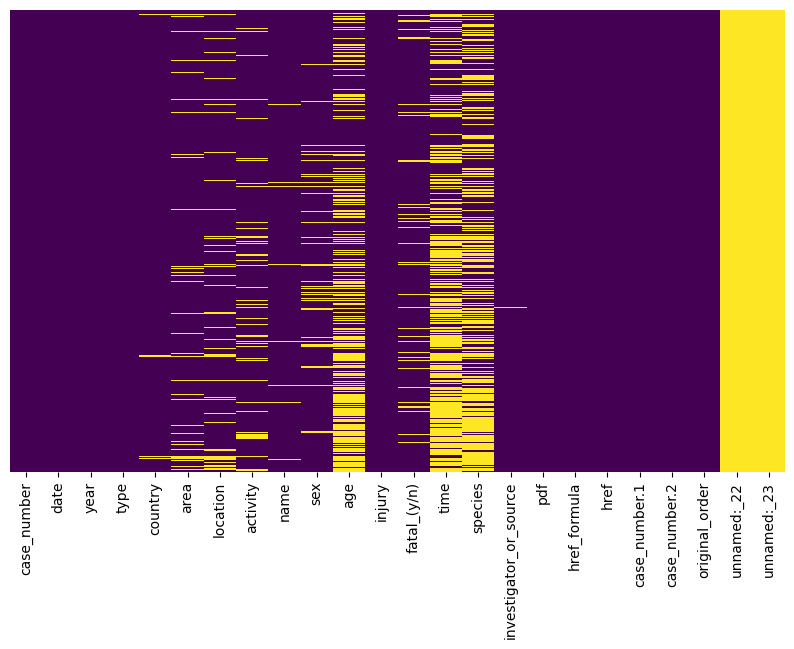

In [18]:
plt.figure(figsize=(10,6))

sns.heatmap(data.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show(); # poner ';' para evitar que imprima la dirección de memoria del objeto que estamos pintando

In [19]:
na_columns=data.isnull().sum()

na_columns[na_columns>0]

case_number                  1
country                     50
area                       453
location                   538
activity                   544
name                       210
sex                        565
age                       2827
injury                      28
fatal_(y/n)                537
time                      3349
species                   2833
investigator_or_source      16
href_formula                 1
unnamed:_22               6295
unnamed:_23               6294
dtype: int64

In [20]:
data.dropna(inplace=True, subset=['species'])
data.dropna(inplace=True, subset=['country', 'area', 'location'])
data.shape

(3203, 24)

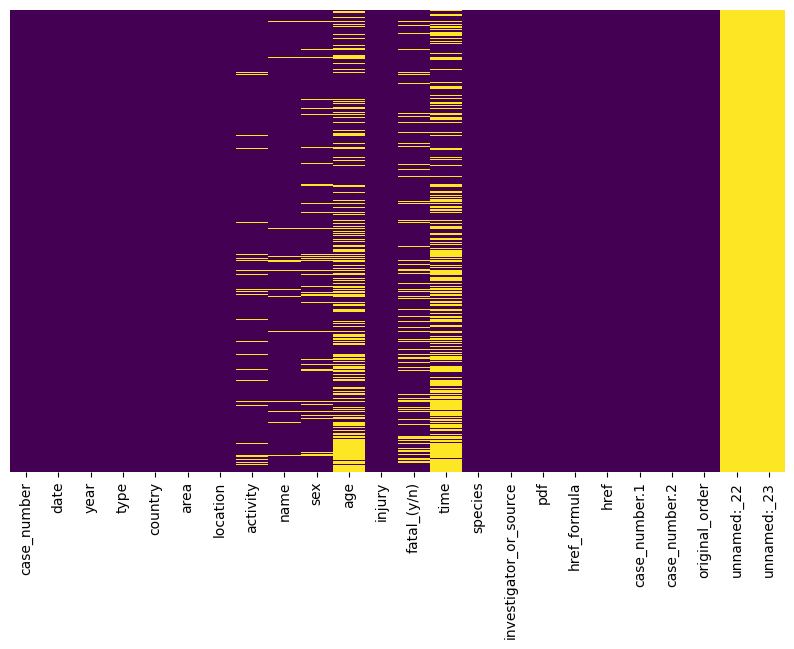

In [21]:
plt.figure(figsize=(10,6))

sns.heatmap(data.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show(); # poner ';' para evitar que imprima la dirección de memoria del objeto que estamos pintando

In [22]:
na_rows=data.isnull().sum(axis=1)

len(na_rows[na_rows>3])

1009

In [23]:
dif_case_number=data.iloc[:][['date']].date.unique()

print(dif_case_number)

['25-Jun-2018' '08-Jun-2018' '04-Jun-2018' ... '1941-1942' '1940 - 1950'
 'Before 1906']


In [26]:
key_word = '\d{2}[-]\w{3}[-]\d{4}'

buscado=[]

for value in data.date:
    busq1= re.search(key_word, value)

    if(busq1==None):

        buscado.append(None)

    else:
        busq1=busq1.group(0)
        buscado.append(busq1)

len(buscado)



3203

In [28]:
data['fechas']=buscado

In [29]:
data.date = pd.to_datetime(data.fechas)

data.head()

,case_number,date,year,type,country,area,location,activity,name,sex,...,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,fechas
0,2018.06.25,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,25-Jun-2018
3,2018.06.08,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,08-Jun-2018
4,2018.06.04,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,04-Jun-2018
6,2018.06.03.a,2018-06-03,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,03-Jun-2018
7,2018.05.27,2018-05-27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,27-May-2018


In [30]:
na_columns=data.isnull().sum()

na_columns[na_columns>0]

date                       291
activity                   190
name                        76
sex                        276
age                       1099
injury                       8
fatal_(y/n)                443
time                      1347
investigator_or_source       7
unnamed:_22               3203
unnamed:_23               3203
fechas                     291
dtype: int64

In [31]:
data.dropna(inplace=True, subset=['date'])

In [32]:
na_columns=data.isnull().sum()

na_columns[na_columns>0]

activity                   156
name                        60
sex                        232
age                        899
injury                       6
fatal_(y/n)                383
time                      1113
investigator_or_source       4
unnamed:_22               2912
unnamed:_23               2912
dtype: int64

In [35]:
#data= data.drop('years', axis=1)

from cmath import nan


data['years']=pd.DatetimeIndex(data.date).year

#for y in data.years:
#    print(int(y))

In [172]:
#data.years = pd.to_datetime(data.date, format='%Y')

In [38]:
#data.head()

In [39]:
#data.info(memory_usage='deep')

In [40]:
cols_obj= data.select_dtypes(include='object')

cols_obj.columns

Index(['case_number', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'unnamed:_22', 'unnamed:_23',
       'fechas'],
      dtype='object')

In [41]:
for cols in cols_obj:
    data[cols] = data[cols].str.lower()
    #data[cols] = data[cols].apply(lambda x: x.strip())
    data[cols] = data[cols].str.strip()


In [43]:
data= data.drop('fechas', axis=1)
data= data.drop('year', axis=1)

In [44]:
data.head()

,case_number,date,type,country,area,location,activity,name,sex,age,...,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,years
0,2018.06.25,2018-06-25,boating,usa,california,"oceanside, san diego county",paddling,julie wolfe,f,57,...,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,2018
3,2018.06.08,2018-06-08,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,NaN,...,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,2018
4,2018.06.04,2018-06-04,provoked,mexico,colima,la ticla,free diving,gustavo ramos,m,NaN,...,a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,2018
6,2018.06.03.a,2018-06-03,unprovoked,brazil,pernambuco,"piedade beach, recife",swimming,jose ernesto da silva,m,18,...,"diario de pernambuco, 6/4/2018",2018.06.03.a-dasilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,2018
7,2018.05.27,2018-05-27,unprovoked,usa,florida,"lighhouse point park, ponce inlet, volusia county",fishing,male,m,52,...,"k. mcmurray, trackingsharks.com",2018.05.27-ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,2018


Arreglo la columna type

In [50]:
dif_case_number=data.iloc[:][['type']].type.unique()

data.loc[((data.type=='boating')),'type']='boat'

dif_case_number

array(['boat', 'unprovoked', 'provoked', 'invalid', 'questionable',
       'sea disaster'], dtype=object)

In [106]:
dif_case_number=data.iloc[:][['country']].country.unique()
len(dif_case_number)

99

In [120]:
existing=[]
notexisting=[]
for country in dif_case_number:
    country=country.capitalize()
    if pycountry.countries.get(name=country)==None:
        notexisting.append(country)

notexisting_dict={'usa':'united states of america',
 'england':'united kingdom',
 'reunion':'reunion',
 'scotland':'united kingdom',
 'taiwan':'taiwan',
 'antigua':'antigua and barbuda',
 'russia':'russia',
 'turks & caicos':'turks and caicos',
 'united arab emirates (uae)':'united arab emirates',
 'vietnam':'vietnam',
 'st. maartin':'sint maarten',
 'grand cayman':'grand cayman',
 'south korea':'south korea',
 'venezuela':'venezuela',
 'micronesia':'federated states of micronesia',
 'okinawa':'japan',
 'egypt / israel':'egypt',
 'western samoa':'samoa',
 'british isles':'united kingdom',
 'columbia':'columbia',
 'new britain':'papua new guinea',
 'new guinea':'papua new guinea',
 'federated states of micronesia':'federated states of micronesia',
 'british west indies':'jamaica',
 'persian gulf':'iran',
 'north pacific ocean':'',
 'north sea':'united kingdom',
 'pacific ocean':'',
 'north atlantic ocean':'',
 'iran':'iran',
 'indian ocean':'',
 'cape verde':'cape verde'}



data=data.replace({"country": notexisting_dict})




,case_number,date,type,country,area,location,activity,name,sex,age,...,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,years
0,2018.06.25,2018-06-25,boat,united states of america,california,"oceanside, san diego county",paddling,julie wolfe,f,57,...,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,2018
3,2018.06.08,2018-06-08,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,NaN,...,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,2018
4,2018.06.04,2018-06-04,provoked,mexico,colima,la ticla,free diving,gustavo ramos,m,NaN,...,a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,2018
6,2018.06.03.a,2018-06-03,unprovoked,brazil,pernambuco,"piedade beach, recife",swimming,jose ernesto da silva,m,18,...,"diario de pernambuco, 6/4/2018",2018.06.03.a-dasilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,2018
7,2018.05.27,2018-05-27,unprovoked,united states of america,florida,"lighhouse point park, ponce inlet, volusia county",fishing,male,m,52,...,"k. mcmurray, trackingsharks.com",2018.05.27-ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,2018


Columna AREA modificada

In [142]:
data= data.drop('area2', axis=1) #Si existe mientras hago pruebas

In [144]:
data.head()

,case_number,date,type,country,area,location,activity,name,sex,age,...,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23,years,area2
0,2018.06.25,2018-06-25,boat,united states of america,california,"oceanside, san diego county",paddling,julie wolfe,f,57,...,2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,2018,california
3,2018.06.08,2018-06-08,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,NaN,...,2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN,2018,new south wales
4,2018.06.04,2018-06-04,provoked,mexico,colima,la ticla,free diving,gustavo ramos,m,NaN,...,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN,2018,colima
6,2018.06.03.a,2018-06-03,unprovoked,brazil,pernambuco,"piedade beach, recife",swimming,jose ernesto da silva,m,18,...,2018.06.03.a-dasilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN,2018,pernambuco
7,2018.05.27,2018-05-27,unprovoked,united states of america,florida,"lighhouse point park, ponce inlet, volusia county",fishing,male,m,52,...,2018.05.27-ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN,2018,florida


In [143]:
dif_area_number=data.iloc[:][['area']].area.unique()
dif_area_number

key_word2= '[(](.*?)[)]'

buscado2=[]

for value in data.area:
    busq2= re.search(key_word2, value)

    if(busq2==None):

        buscado2.append(value)

    else:
        busq2=busq2.group(0)
        busq2=value.removesuffix(busq2)
        busq2=busq2.strip()
        buscado2.append(busq2)
len(buscado2)

data['area2']=buscado2

In [145]:
dif_area_number2=data.iloc[:][['area2']].area2.unique()
dif_area_number2

array(['california', 'new south wales', 'colima', 'pernambuco', 'florida',
       'queensland', 'cornwall', 'cocos island', 'western australia',
       'alifu alifu atoll', 'western cape province', 'hawaii', 'hua hin',
       'new providence', 'alagoas', 'eastern cape province',
       'kwazulu-natal', 'boi island, victoria', 'galapagos islands',
       'fernando de noronha', 'sepang', 'holquin province',
       'south australia', 'north island', 'new york', 'canary islands',
       'victoria', 'castellón', 'massachusetts', 'south carolina',
       'red sea protectorate', 'new jersey', 'majorca', 'washington',
       'tabasco', 'anjouan', 'south devon', 'luzon island', 'bali',
       'alicante province', 'abaco islands', 'alabama', 'texas',
       'north carolina', 'suez', 'tuamotos', 'grand terre',
       'santa catarina state', 'grand cayman', 'tasmania',
       'balneário camboriú', 'fujairah emirate', 'grand canary island',
       'phuket', 'alicante', 'grand bahama island', 'le po

Eliminar más adelante la columna AREA!!!!

In [ ]:
#data= data.drop('area', axis=1)